In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import load_model
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
%matplotlib inline 

In [2]:
batch_size=30
image_size=(128, 128)

# Набор данных для обучения

In [3]:
train_dataset = image_dataset_from_directory('./traning_set',
                                             subset='training',
                                             seed=42,
                                             validation_split=0.1,
                                             batch_size=batch_size,
                                             image_size=image_size,
                                             color_mode="grayscale")

Found 6303 files belonging to 210 classes.
Using 5673 files for training.


# Набор данных для валидации

In [4]:
train_dataset

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [5]:
validation_dataset = image_dataset_from_directory('./traning_set',
                                             subset='validation',
                                             seed=42,
                                             validation_split=0.1,
                                             batch_size=batch_size,
                                             image_size=image_size,
                                             color_mode="grayscale")

Found 6303 files belonging to 210 classes.
Using 630 files for validation.


In [6]:
class_names = train_dataset.class_names
class_names

['AN21',
 'AN211',
 'AN22',
 'AN221',
 'AN222',
 'AN31',
 'AN311',
 'AN32',
 'AN321',
 'AN33',
 'AND2',
 'AND3',
 'AND4',
 'AND5',
 'AND6',
 'ANTENNACELLN2',
 'ANTENNACELLNP2',
 'ANTENNACELLP2',
 'AO21',
 'AO211',
 'AO22',
 'AO221',
 'AO222',
 'AO31',
 'AO311',
 'AO32',
 'AO321',
 'AO33',
 'BTH',
 'BTL',
 'BU',
 'CAG',
 'CLKVBUF',
 'DFF',
 'DFFQ',
 'DFFR',
 'DFFRQ',
 'DFFRS',
 'DFFRSQ',
 'DFFS',
 'DFFSQ',
 'DFR',
 'DFR2',
 'DFR4',
 'DFR8',
 'DFRQ',
 'DFRQ2',
 'DFRQ4',
 'DFRQ8',
 'DFRR',
 'DFRR2',
 'DFRR4',
 'DFRR8',
 'DFRRQ',
 'DFRRQ2',
 'DFRRQ4',
 'DFRRQ8',
 'DFRRS',
 'DFRRSQ',
 'DFRS',
 'DFRSQ',
 'DLH',
 'DLHQ',
 'DLHR',
 'DLHRQ',
 'DLHRS',
 'DLHRSQ',
 'DLHRT',
 'DLHS',
 'DLHSQ',
 'DLHST',
 'DLHT',
 'DLL',
 'DLLQ',
 'DLLR',
 'DLLRQ',
 'DLLRS',
 'DLLRSQ',
 'DLLRT',
 'DLLRT2',
 'DLLRT4',
 'DLLRT8',
 'DLLS',
 'DLLSQ',
 'DLLST',
 'DLLT',
 'DLLT2',
 'DLLT4',
 'DLLT8',
 'EN2',
 'EN3',
 'EO2',
 'EO3',
 'FA',
 'FCNE',
 'FEED',
 'HA',
 'IN',
 'ITH',
 'ITL',
 'LGCN',
 'LGCP',
 'LOGIC0',
 'LOGI

In [7]:
import csv 

with open("class_names.csv", "w", newline='') as file:
    csv.writer(file).writerow(class_names)

# Набор данных для тестирования

In [8]:
test_dataset = image_dataset_from_directory('./test_set',
                                             batch_size=batch_size,
                                             image_size=image_size,
                                             color_mode="grayscale")


Found 633 files belonging to 210 classes.


In [9]:
test_dataset.class_names

['AN21',
 'AN211',
 'AN22',
 'AN221',
 'AN222',
 'AN31',
 'AN311',
 'AN32',
 'AN321',
 'AN33',
 'AND2',
 'AND3',
 'AND4',
 'AND5',
 'AND6',
 'ANTENNACELLN2',
 'ANTENNACELLNP2',
 'ANTENNACELLP2',
 'AO21',
 'AO211',
 'AO22',
 'AO221',
 'AO222',
 'AO31',
 'AO311',
 'AO32',
 'AO321',
 'AO33',
 'BTH',
 'BTL',
 'BU',
 'CAG',
 'CLKVBUF',
 'DFF',
 'DFFQ',
 'DFFR',
 'DFFRQ',
 'DFFRS',
 'DFFRSQ',
 'DFFS',
 'DFFSQ',
 'DFR',
 'DFR2',
 'DFR4',
 'DFR8',
 'DFRQ',
 'DFRQ2',
 'DFRQ4',
 'DFRQ8',
 'DFRR',
 'DFRR2',
 'DFRR4',
 'DFRR8',
 'DFRRQ',
 'DFRRQ2',
 'DFRRQ4',
 'DFRRQ8',
 'DFRRS',
 'DFRRSQ',
 'DFRS',
 'DFRSQ',
 'DLH',
 'DLHQ',
 'DLHR',
 'DLHRQ',
 'DLHRS',
 'DLHRSQ',
 'DLHRT',
 'DLHS',
 'DLHSQ',
 'DLHST',
 'DLHT',
 'DLL',
 'DLLQ',
 'DLLR',
 'DLLRQ',
 'DLLRS',
 'DLLRSQ',
 'DLLRT',
 'DLLRT2',
 'DLLRT4',
 'DLLRT8',
 'DLLS',
 'DLLSQ',
 'DLLST',
 'DLLT',
 'DLLT2',
 'DLLT4',
 'DLLT8',
 'EN2',
 'EN3',
 'EO2',
 'EO3',
 'FA',
 'FCNE',
 'FEED',
 'HA',
 'IN',
 'ITH',
 'ITL',
 'LGCN',
 'LGCP',
 'LOGIC0',
 'LOGI

In [10]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

# Модель из интернета взята для сравнения

In [11]:
# Создаем последовательную модель
model = Sequential()
# Сверточный слой
model.add(Conv2D(16, (5, 5), padding='same', 
                 input_shape=(128, 128, 1), activation='relu'))
# Слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Сверточный слой
model.add(Conv2D(32, (5, 5), activation='relu', padding='same'))
# Слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Сверточный слой
model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
# Слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Сверточный слой
model.add(Conv2D(128, (5, 5), activation='relu', padding='same'))
# Слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Полносвязная часть нейронной сети для классификации
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
# Выходной слой, 211 нейрон по количеству классов
model.add(Dense(211, activation='softmax'))

In [12]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [13]:
history = model.fit(train_dataset, 
                    validation_data=validation_dataset,
                    epochs=15,
                    verbose=2)

Epoch 1/15
190/190 - 215s - loss: 3.9767 - accuracy: 0.3289 - val_loss: 0.7430 - val_accuracy: 0.7762 - 215s/epoch - 1s/step
Epoch 2/15
190/190 - 200s - loss: 0.3649 - accuracy: 0.8904 - val_loss: 0.0384 - val_accuracy: 0.9825 - 200s/epoch - 1s/step
Epoch 3/15
190/190 - 192s - loss: 0.1127 - accuracy: 0.9653 - val_loss: 0.0304 - val_accuracy: 0.9889 - 192s/epoch - 1s/step
Epoch 4/15
190/190 - 193s - loss: 0.0973 - accuracy: 0.9700 - val_loss: 0.0217 - val_accuracy: 0.9905 - 193s/epoch - 1s/step
Epoch 5/15
190/190 - 194s - loss: 0.0590 - accuracy: 0.9801 - val_loss: 0.0139 - val_accuracy: 0.9889 - 194s/epoch - 1s/step
Epoch 6/15
190/190 - 186s - loss: 0.0883 - accuracy: 0.9739 - val_loss: 0.0377 - val_accuracy: 0.9857 - 186s/epoch - 979ms/step
Epoch 7/15
190/190 - 186s - loss: 0.1109 - accuracy: 0.9711 - val_loss: 0.0438 - val_accuracy: 0.9825 - 186s/epoch - 977ms/step
Epoch 8/15
190/190 - 233s - loss: 0.0623 - accuracy: 0.9822 - val_loss: 0.0270 - val_accuracy: 0.9905 - 233s/epoch - 1s

In [14]:
scores = model.evaluate(test_dataset, verbose=1)

22/22 [==============================] - 8s 332ms/step - loss: 0.0140 - accuracy: 0.9905


In [15]:
print("Доля верных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

Доля верных ответов на тестовых данных, в процентах: 99.0521


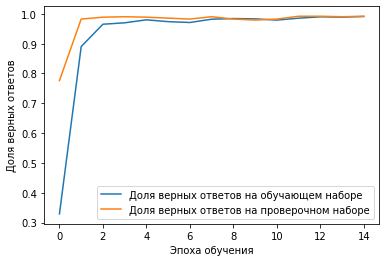

<Figure size 432x288 with 0 Axes>

In [18]:
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()
plt.savefig('model_internet_1.png')

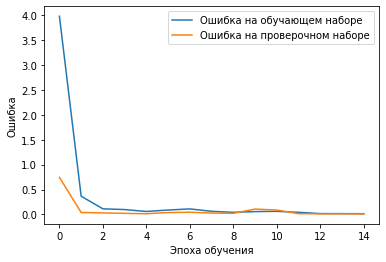

<Figure size 432x288 with 0 Axes>

In [20]:
plt.plot(history.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.plot()
plt.show()
plt.savefig('model_internet_2.png')

In [21]:
model.save("Symbol_Check_model_internet.h5")

In [18]:
model_json = model.to_json()

In [19]:
with open("Symbol_Check_model.json", "w") as json_file:
    json_file.write(model_json)

In [20]:
from keras.models import model_from_json


json_file = open('Symbol_Check_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()

In [22]:
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("Symbol_Check_model_10.h5")



In [23]:
loaded_model.compile(loss='sparse_categorical_crossentropy',
                      optimizer="adam",
                      metrics=['accuracy'])

In [24]:
scores = loaded_model.evaluate(test_dataset, verbose=1)

22/22 [==============================] - 7s 300ms/step - loss: 0.0806 - accuracy: 0.9670


In [11]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

# простейший вариант нейросети

In [22]:
# Создаем последовательную модель
model_simple = Sequential()
# Сверточный слой
model_simple.add(Conv2D(16, (5, 5), padding='same', 
                 input_shape=(128, 128, 1), activation='relu'))
# Слой подвыборки
model_simple.add(MaxPooling2D(pool_size=(2, 2)))
# Полносвязная часть нейронной сети для классификации
model_simple.add(Flatten())
model_simple.add(Dense(256, activation='relu'))
# Выходной слой, 211 нейрон по количеству классов
model_simple.add(Dense(211, activation='softmax'))
model_simple.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 128, 128, 16)      416       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 65536)             0         
                                                                 
 dense_3 (Dense)             (None, 256)               16777472  
                                                                 
 dense_4 (Dense)             (None, 211)               54227     
                                                                 
Total params: 16,832,115
Trainable params: 16,832,115
Non-trainable params: 0
__________________________________________

In [23]:
model_simple.compile(loss='sparse_categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [24]:
history = model_simple.fit(train_dataset, 
                    validation_data=validation_dataset,
                    epochs=15,
                    verbose=2)

Epoch 1/15
190/190 - 65s - loss: 110.8413 - accuracy: 0.5872 - val_loss: 0.7244 - val_accuracy: 0.8587 - 65s/epoch - 342ms/step
Epoch 2/15
190/190 - 74s - loss: 0.4489 - accuracy: 0.9082 - val_loss: 0.4351 - val_accuracy: 0.9079 - 74s/epoch - 389ms/step
Epoch 3/15
190/190 - 76s - loss: 0.2700 - accuracy: 0.9533 - val_loss: 0.3430 - val_accuracy: 0.9302 - 76s/epoch - 399ms/step
Epoch 4/15
190/190 - 72s - loss: 0.1396 - accuracy: 0.9676 - val_loss: 0.1215 - val_accuracy: 0.9635 - 72s/epoch - 379ms/step
Epoch 5/15
190/190 - 72s - loss: 0.0786 - accuracy: 0.9806 - val_loss: 0.1360 - val_accuracy: 0.9698 - 72s/epoch - 377ms/step
Epoch 6/15
190/190 - 70s - loss: 0.0453 - accuracy: 0.9863 - val_loss: 0.0917 - val_accuracy: 0.9762 - 70s/epoch - 367ms/step
Epoch 7/15
190/190 - 72s - loss: 0.0565 - accuracy: 0.9857 - val_loss: 0.0683 - val_accuracy: 0.9746 - 72s/epoch - 381ms/step
Epoch 8/15
190/190 - 71s - loss: 0.1583 - accuracy: 0.9787 - val_loss: 0.2079 - val_accuracy: 0.9619 - 71s/epoch - 3

In [79]:
scores = model_simple.evaluate(test_dataset, verbose=1)

22/22 [==============================] - 11s 279ms/step - loss: 0.1494 - accuracy: 0.9748


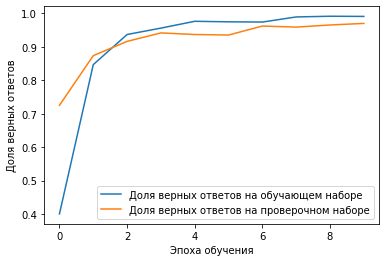

In [76]:
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

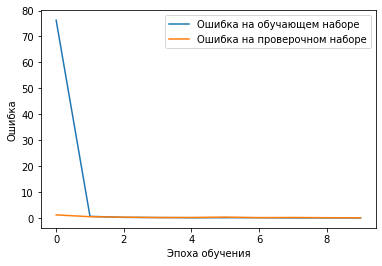

In [77]:
plt.plot(history.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [ ]:
model.save("Symbol_Check_model_simple.h5")

# Увеличим количество фильтров до 32

In [81]:
# Создаем последовательную модель
model_s32 = Sequential()
# Сверточный слой
model_s32.add(Conv2D(32, (5, 5), padding='same', 
                 input_shape=(128, 128, 1), activation='relu'))
# Слой подвыборки
model_s32.add(MaxPooling2D(pool_size=(2, 2)))
# Полносвязная часть нейронной сети для классификации
model_s32.add(Flatten())
model_s32.add(Dense(256, activation='relu'))
# Выходной слой, 211 нейрон по количеству классов
model_s32.add(Dense(211, activation='softmax'))
model_s32.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 128, 128, 32)      832       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 131072)            0         
                                                                 
 dense_23 (Dense)            (None, 256)               33554688  
                                                                 
 dense_24 (Dense)            (None, 211)               54227     
                                                                 
Total params: 33,609,747
Trainable params: 33,609,747
Non-trainable params: 0
_________________________________________

In [85]:
model_s32.compile(loss='sparse_categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [83]:
history = model_s32.fit(train_dataset, 
                    validation_data=validation_dataset,
                    epochs=10,
                    verbose=2)

Epoch 1/10
190/190 - 96s - loss: 372.3093 - accuracy: 0.3456 - val_loss: 1.6269 - val_accuracy: 0.6698 - 96s/epoch - 508ms/step
Epoch 2/10
190/190 - 95s - loss: 0.8404 - accuracy: 0.8122 - val_loss: 0.6136 - val_accuracy: 0.8515 - 95s/epoch - 499ms/step
Epoch 3/10
190/190 - 96s - loss: 0.3243 - accuracy: 0.9258 - val_loss: 0.4023 - val_accuracy: 0.9131 - 96s/epoch - 506ms/step
Epoch 4/10
190/190 - 105s - loss: 0.1455 - accuracy: 0.9651 - val_loss: 0.2538 - val_accuracy: 0.9352 - 105s/epoch - 553ms/step
Epoch 5/10
190/190 - 115s - loss: 0.0821 - accuracy: 0.9765 - val_loss: 0.1600 - val_accuracy: 0.9479 - 115s/epoch - 604ms/step
Epoch 6/10
190/190 - 119s - loss: 0.0932 - accuracy: 0.9772 - val_loss: 0.1564 - val_accuracy: 0.9542 - 119s/epoch - 625ms/step
Epoch 7/10
190/190 - 114s - loss: 0.1149 - accuracy: 0.9761 - val_loss: 0.2280 - val_accuracy: 0.9494 - 114s/epoch - 599ms/step
Epoch 8/10
190/190 - 125s - loss: 0.0883 - accuracy: 0.9802 - val_loss: 0.1399 - val_accuracy: 0.9558 - 125s

In [86]:
scores = model_s32.evaluate(test_dataset, verbose=1)

22/22 [==============================] - 3s 135ms/step - loss: 0.8137 - accuracy: 0.9041


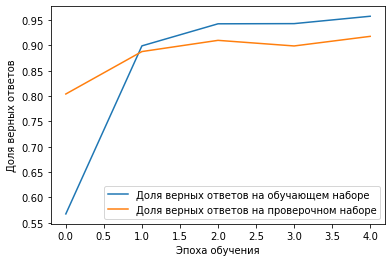

In [58]:
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()


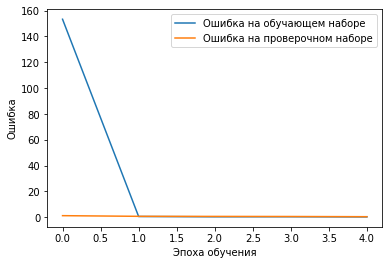

In [60]:
plt.plot(history.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

 # добавляем еще один фильтр уменьшаем размер ядра на втором фильтре
 

In [87]:
# Создаем последовательную модель
model_s16_32 = Sequential()
# Сверточный слой
model_s16_32.add(Conv2D(16, (5, 5), padding='same', 
                 input_shape=(128, 128, 1), activation='relu'))
# Слой подвыборки
model_s16_32.add(MaxPooling2D(pool_size=(2, 2)))
# Сверточный слой
model_s16_32.add(Conv2D(32, (3, 3), padding='same', 
                 input_shape=(128, 128, 1), activation='relu'))
# Слой подвыборки
model_s16_32.add(MaxPooling2D(pool_size=(2, 2)))
# Полносвязная часть нейронной сети для классификации
model_s16_32.add(Flatten())
model_s16_32.add(Dense(512, activation='relu'))
# Выходной слой, 211 нейрон по количеству классов
model_s16_32.add(Dense(211, activation='softmax'))
model_s16_32.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 128, 128, 16)      416       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 64, 64, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 32768)             0         
                                                                 
 dense_25 (Dense)            (None, 512)             

In [88]:
model_s16_32.compile(loss='sparse_categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [89]:
history = model_s16_32.fit(train_dataset, 
                    validation_data=validation_dataset,
                    epochs=10,
                    verbose=2)

Epoch 1/10
190/190 - 90s - loss: 17.5553 - accuracy: 0.5276 - val_loss: 0.5660 - val_accuracy: 0.8120 - 90s/epoch - 471ms/step
Epoch 2/10
190/190 - 88s - loss: 0.3393 - accuracy: 0.8896 - val_loss: 0.2735 - val_accuracy: 0.9036 - 88s/epoch - 465ms/step
Epoch 3/10
190/190 - 87s - loss: 0.1118 - accuracy: 0.9628 - val_loss: 0.2190 - val_accuracy: 0.9479 - 87s/epoch - 459ms/step
Epoch 4/10
190/190 - 87s - loss: 0.0951 - accuracy: 0.9744 - val_loss: 0.0912 - val_accuracy: 0.9684 - 87s/epoch - 456ms/step
Epoch 5/10
190/190 - 83s - loss: 0.0541 - accuracy: 0.9819 - val_loss: 0.0976 - val_accuracy: 0.9700 - 83s/epoch - 439ms/step
Epoch 6/10
190/190 - 80s - loss: 0.0653 - accuracy: 0.9821 - val_loss: 0.1020 - val_accuracy: 0.9652 - 80s/epoch - 424ms/step
Epoch 7/10
190/190 - 80s - loss: 0.0418 - accuracy: 0.9854 - val_loss: 0.1587 - val_accuracy: 0.9700 - 80s/epoch - 422ms/step
Epoch 8/10
190/190 - 81s - loss: 0.0549 - accuracy: 0.9865 - val_loss: 0.2665 - val_accuracy: 0.9558 - 81s/epoch - 42

In [90]:
scores = model_s16_32.evaluate(test_dataset, verbose=1)

22/22 [==============================] - 3s 119ms/step - loss: 0.1911 - accuracy: 0.9654


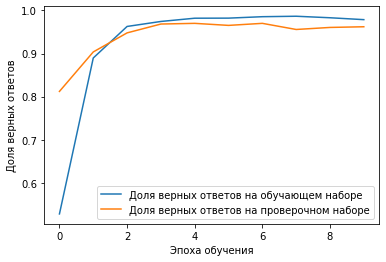

In [91]:
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

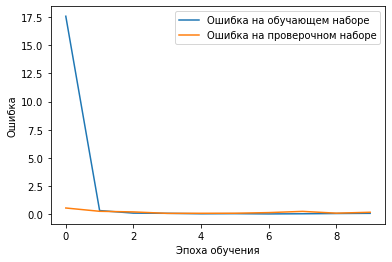

In [92]:
plt.plot(history.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

# добавим еще один сверточный слой

In [93]:
# Создаем последовательную модель
model_s16_32_64 = Sequential()
# Сверточный слой
model_s16_32_64.add(Conv2D(16, (5, 5), padding='same', 
                 input_shape=(128, 128, 1), activation='relu'))
# Слой подвыборки
model_s16_32_64.add(MaxPooling2D(pool_size=(2, 2)))
# Сверточный слой
model_s16_32_64.add(Conv2D(32, (3, 3), padding='same', 
                 input_shape=(128, 128, 1), activation='relu'))
# Слой подвыборки
model_s16_32_64.add(MaxPooling2D(pool_size=(2, 2)))
# Сверточный слой
model_s16_32_64.add(Conv2D(64, (3, 3), padding='same', 
                 input_shape=(128, 128, 1), activation='relu'))
# Слой подвыборки
model_s16_32_64.add(MaxPooling2D(pool_size=(2, 2)))
# Полносвязная часть нейронной сети для классификации
model_s16_32_64.add(Flatten())
model_s16_32_64.add(Dense(512, activation='relu'))
# Выходной слой, 211 нейрон по количеству классов
model_s16_32_64.add(Dense(211, activation='softmax'))
model_s16_32_64.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 128, 128, 16)      416       
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 64, 64, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_39 (Conv2D)          (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_40 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 16, 16, 64)     

In [94]:
model_s16_32_64.compile(loss='sparse_categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [98]:
history = model_s16_32_64.fit(train_dataset, 
                    validation_data=validation_dataset,
                    epochs=20,
                    verbose=2)

Epoch 1/20
190/190 - 86s - loss: 0.2901 - accuracy: 0.9331 - val_loss: 0.3067 - val_accuracy: 0.9005 - 86s/epoch - 455ms/step
Epoch 2/20
190/190 - 86s - loss: 0.1113 - accuracy: 0.9679 - val_loss: 0.0379 - val_accuracy: 0.9795 - 86s/epoch - 450ms/step
Epoch 3/20
190/190 - 86s - loss: 0.0289 - accuracy: 0.9858 - val_loss: 0.0369 - val_accuracy: 0.9810 - 86s/epoch - 453ms/step
Epoch 4/20
190/190 - 86s - loss: 0.0203 - accuracy: 0.9900 - val_loss: 0.0250 - val_accuracy: 0.9842 - 86s/epoch - 454ms/step
Epoch 5/20
190/190 - 86s - loss: 0.0177 - accuracy: 0.9896 - val_loss: 0.0340 - val_accuracy: 0.9810 - 86s/epoch - 455ms/step
Epoch 6/20
190/190 - 86s - loss: 0.0168 - accuracy: 0.9919 - val_loss: 0.0302 - val_accuracy: 0.9826 - 86s/epoch - 452ms/step
Epoch 7/20
190/190 - 86s - loss: 0.0158 - accuracy: 0.9916 - val_loss: 0.0317 - val_accuracy: 0.9842 - 86s/epoch - 452ms/step
Epoch 8/20
190/190 - 83s - loss: 0.0150 - accuracy: 0.9916 - val_loss: 0.0351 - val_accuracy: 0.9842 - 83s/epoch - 437

In [97]:
scores = model_s16_32_64.evaluate(test_dataset, verbose=1)

22/22 [==============================] - 3s 133ms/step - loss: 0.0481 - accuracy: 0.9858


In [101]:
model_s16_32_64.save("Symbol_Check_model_s16_32_64.h5")

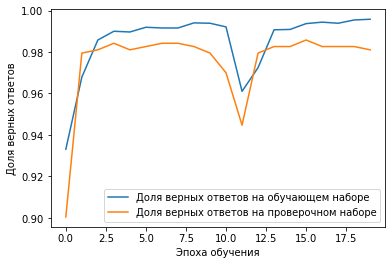

In [102]:
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

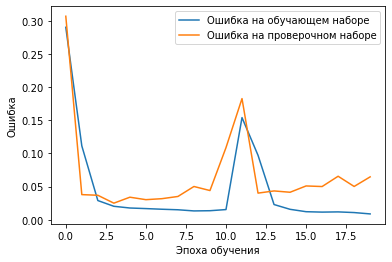

In [103]:
plt.plot(history.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

# Добавляем слой Dropout 

In [104]:
# Создаем последовательную модель
model_s16_32_64_drop = Sequential()
# Сверточный слой
model_s16_32_64_drop.add(Conv2D(16, (5, 5), padding='same', 
                 input_shape=(128, 128, 1), activation='relu'))
# Слой подвыборки
model_s16_32_64_drop.add(MaxPooling2D(pool_size=(2, 2)))
# Сверточный слой
model_s16_32_64_drop.add(Conv2D(32, (3, 3), padding='same', 
                 input_shape=(128, 128, 1), activation='relu'))
# Слой подвыборки
model_s16_32_64_drop.add(MaxPooling2D(pool_size=(2, 2)))
# Сверточный слой
model_s16_32_64_drop.add(Conv2D(64, (3, 3), padding='same', 
                 input_shape=(128, 128, 1), activation='relu'))
# Слой подвыборки
model_s16_32_64_drop.add(MaxPooling2D(pool_size=(2, 2)))
# Полносвязная часть нейронной сети для классификации
model_s16_32_64_drop.add(Flatten())
model_s16_32_64_drop.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
# Выходной слой, 211 нейрон по количеству классов
model_s16_32_64_drop.add(Dense(211, activation='softmax'))
model_s16_32_64_drop.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_41 (Conv2D)          (None, 128, 128, 16)      416       
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 64, 64, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 16, 16, 64)     

In [105]:
model_s16_32_64_drop.compile(loss='sparse_categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [107]:
history = model_s16_32_64_drop.fit(train_dataset, 
                    validation_data=validation_dataset,
                    epochs=30,
                    verbose=2)

Epoch 1/30
190/190 - 108s - loss: 1.8376 - accuracy: 0.6089 - val_loss: 0.4356 - val_accuracy: 0.8610 - 108s/epoch - 567ms/step
Epoch 2/30
190/190 - 100s - loss: 0.1724 - accuracy: 0.9452 - val_loss: 0.0951 - val_accuracy: 0.9795 - 100s/epoch - 525ms/step
Epoch 3/30
190/190 - 106s - loss: 0.0629 - accuracy: 0.9807 - val_loss: 0.0820 - val_accuracy: 0.9810 - 106s/epoch - 558ms/step
Epoch 4/30
190/190 - 99s - loss: 0.1196 - accuracy: 0.9709 - val_loss: 0.1420 - val_accuracy: 0.9652 - 99s/epoch - 519ms/step
Epoch 5/30
190/190 - 87s - loss: 0.0902 - accuracy: 0.9763 - val_loss: 0.1086 - val_accuracy: 0.9605 - 87s/epoch - 459ms/step
Epoch 6/30
190/190 - 93s - loss: 0.0473 - accuracy: 0.9839 - val_loss: 0.0487 - val_accuracy: 0.9795 - 93s/epoch - 489ms/step
Epoch 7/30
190/190 - 97s - loss: 0.0266 - accuracy: 0.9865 - val_loss: 0.0478 - val_accuracy: 0.9795 - 97s/epoch - 513ms/step
Epoch 8/30
190/190 - 93s - loss: 0.0212 - accuracy: 0.9893 - val_loss: 0.0356 - val_accuracy: 0.9826 - 93s/epoch

In [108]:
model_s16_32_64_drop.save("Symbol_Check_model_s16_32_64_drop.h5")

In [109]:
scores = model_s16_32_64_drop.evaluate(test_dataset, verbose=1)

22/22 [==============================] - 10s 269ms/step - loss: 0.0520 - accuracy: 0.9780


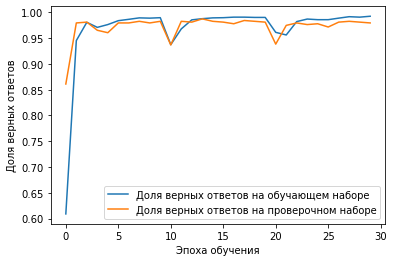

In [110]:
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

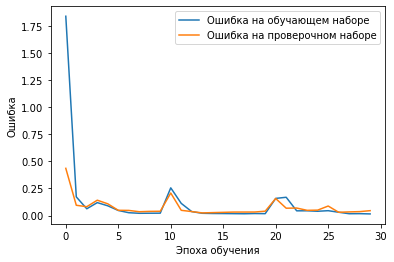

In [111]:
plt.plot(history.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [158]:
y_pred = model_s16_32_64_drop.predict(test_dataset)

In [160]:
predicted_categories = tf.argmax(y_pred, axis=1)
predicted_categories

<tf.Tensor: shape=(636,), dtype=int64, numpy=
array([104, 121,  21,  91, 153,  59, 165,  19, 185, 130,  30,  95, 170,
        84, 200, 147,  11, 182, 156, 195,  47,  22, 111,  69,  49,  98,
       106,  90, 117,  61,  67, 134,  45,  76,  65, 116, 197,  41,  54,
        52, 116,  31, 156, 186, 168, 129, 174,  58, 167,  12, 191,  67,
       118, 194, 167, 120, 163,  95, 161, 158,  16,  26,   3,  85,  65,
        70,  39,  71, 162, 129, 197, 195,  47, 114,  99,   4,  59,  30,
       149,  37,  41, 189,  50, 155,  54, 117,  51, 115,  27, 159,  11,
        95,   6, 170,  98, 181, 151, 179, 153, 154, 160,  23, 118, 193,
       172, 184,  20,   3,  28,   7,  21, 112, 196, 202, 155,  48, 150,
        79, 178,  63,  78, 186,   1,  10,  87, 203, 157,  19,  92,  53,
        26,  34, 152,  12, 165, 166, 203, 106, 209, 111,  93,  43,  31,
       108, 158, 143, 132,  46, 110,  11, 170,  12, 126,  23, 192, 123,
        26, 126,  29, 105, 128, 131,  55,  54, 177, 190,  69,   1,  38,
       204,  10,  

In [162]:
true_categories = tf.concat([y for x, y in test_dataset], axis=0)
true_categories

<tf.Tensor: shape=(636,), dtype=int32, numpy=
array([151, 184, 105,  99,  16, 144,  49, 104, 133, 165, 106,  36,  47,
        23,  10,  23,  88, 124, 106,   7, 205,  19,  74, 160,  98, 182,
        12, 148,  54, 178,  97, 162, 191, 182, 167,  84, 100, 128,  30,
       135, 170,   6,  67, 109,  23, 178,  39, 104,  46,  44, 108, 203,
         9, 117,  61,  74,  43, 110,  31,  37,  64, 145,   5,  15,  91,
       135, 155,  28,   2, 153, 171, 107, 139, 129, 197,  87, 166,  60,
        37,  15,  44, 149, 134, 101, 114,  13, 165,   0,  16,  58,  67,
         0, 112, 146,  24,  26, 198, 118,  17, 196,   4, 145, 113,  77,
       137,  59,  27, 143,  41,  63, 172, 204,  35,  95, 175, 139, 132,
        54,  91,  18,  27,  92,  12,  51,  30,  18,  64, 123,  25, 152,
        15,  84,  61, 146,  46,  75,   9,  99, 105, 154,  31,  81,  97,
       163,  70, 128,  43,  68, 171,  69, 111, 190, 156,  65,  72,  55,
       208,  11, 115,  26,  71, 123, 115,  67,  89,  42, 153,  42,  80,
       207,  53,  

In [165]:
confusion_matrix(predicted_categories, true_categories)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

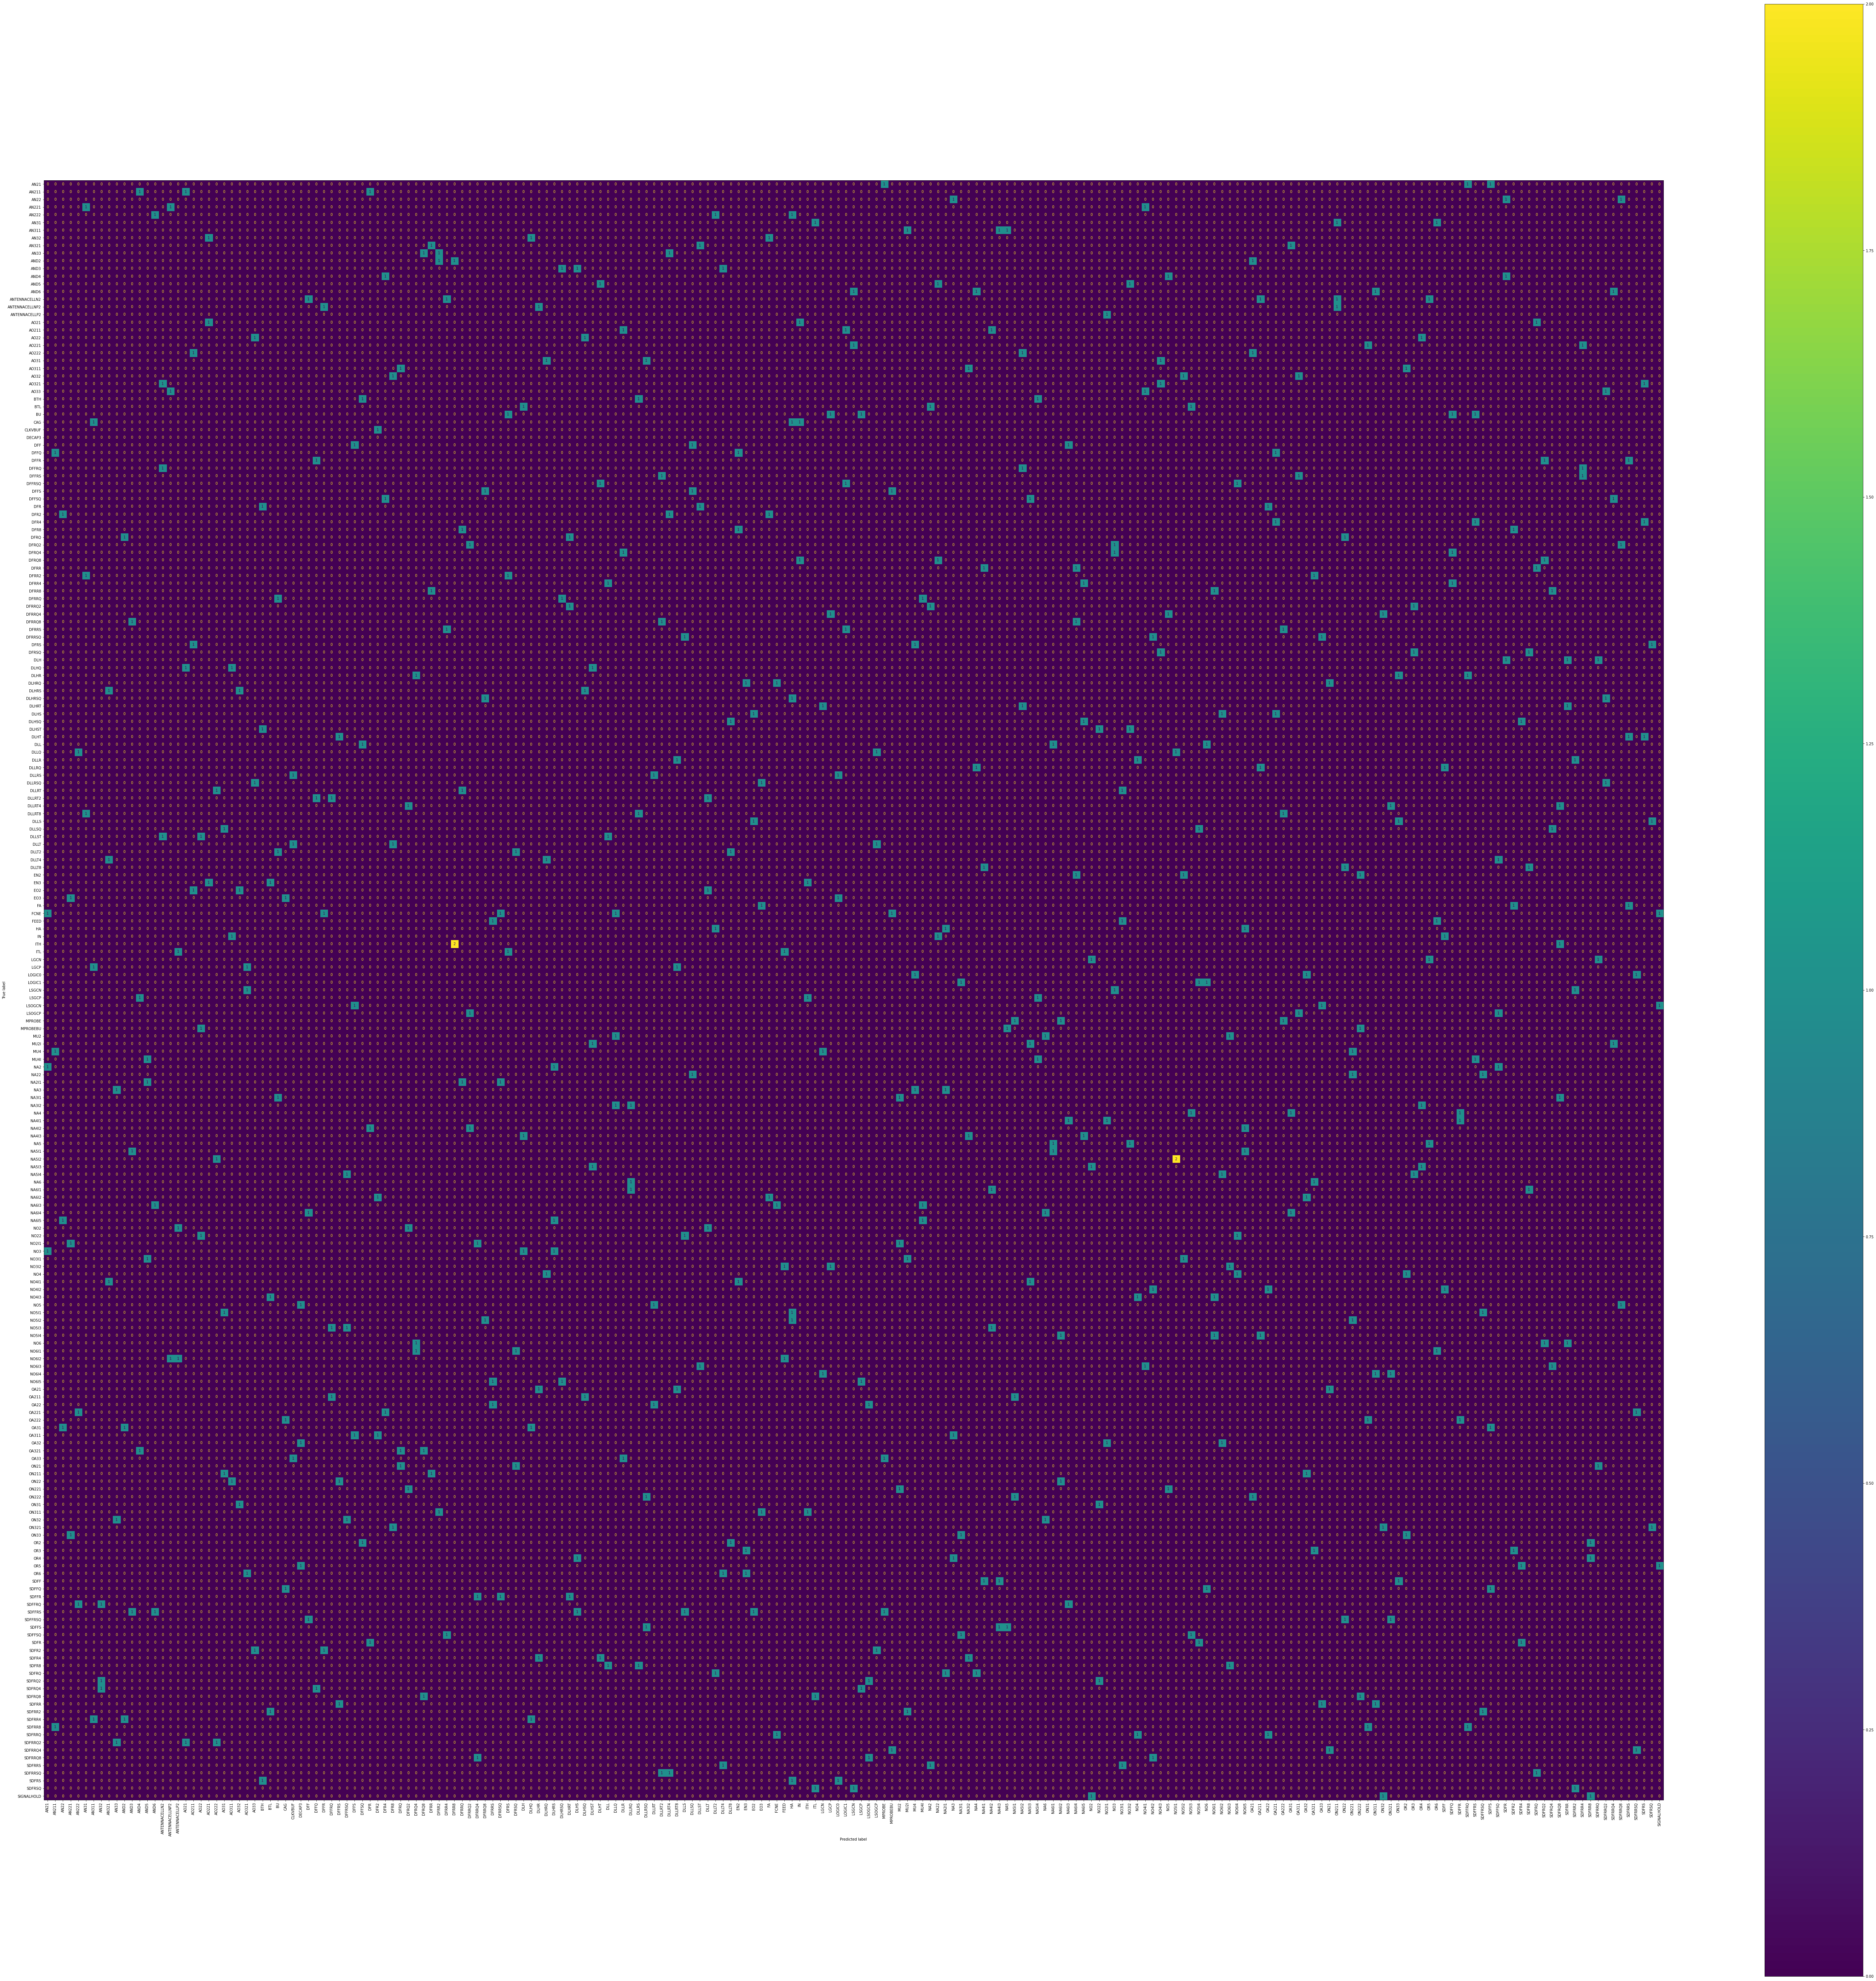

In [185]:
cm = confusion_matrix(predicted_categories, true_categories)
disp = ConfusionMatrixDisplay(cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(100,100))
disp.plot(ax=ax, xticks_rotation=90)
plt.savefig('Conf_Matrx.png')

In [ ]:
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(np.arange(25), np.arange(25))
cmp = ConfusionMatrixDisplay(cm, display_labels=np.arange(25))
fig, ax = plt.subplots(figsize=(10,10))
cmp.plot(ax=ax)

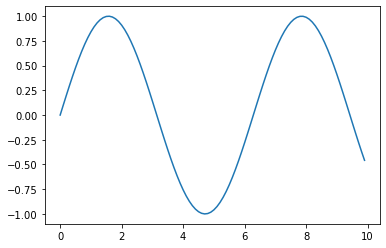

In [174]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0, 10, 0.1)
y = np.sin(x)

plt.plot(x, y)
plt.show()

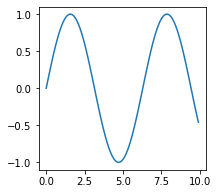

In [175]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0, 10, 0.1)
y = np.sin(x)

plt.figure(figsize=(3, 3))
plt.plot(x, y)
plt.show()

In [139]:
loaded_model = load_model('Symbol_Check_model_s16_32_64_drop.h5')

In [140]:
scores = loaded_model.evaluate(test_dataset, verbose=1)

22/22 [==============================] - 3s 141ms/step - loss: 0.0520 - accuracy: 0.9780


In [152]:
test_img = cv2.imread("thumbnail_128x128.png")
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)
ret,  test_img = cv2.threshold(test_img, 20, 255, 0)
test_img

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [153]:
x = np.array([test_img])
x.shape

(1, 128, 128)

In [154]:
prediction = loaded_model.predict(x)

In [155]:
#prediction.argmax(-1)

In [156]:
prediction = np.argmax(prediction)
print("Номер класса:", prediction)
print("Название класса:", class_names[prediction])

Номер класса: 29
Название класса: BTL
